In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams["figure.figsize"] = (18, 6)

# Beer Advocate Informations

## ba_beers.csv

In [2]:
ba_beers = pd.read_csv('generated/new_ba_beers.csv')

| Column Name       | Description                                   | Commentary                              |
|-------------------|-----------------------------------------------|-----------------------------------------|
| beer_id           | id of each beer.                              |  unique for each beer. (int)            |
| beer_name         | name of the beer.                             | (str)                                     |
| brewery_id        | id of brewery of the beer.                    | unique for each brewery. (int)               |
| brewery_name      | name of the brewery.                              |  (str)            |
| style             | style of the beer.                            | 104 differents styles (str)             |
| nbr_ratings       | Total number of ratings for the beer.         | (int)               |
| nbr_reviews       | Total number of reviews for the beer.         | (int)               |
| avg        |       -           |              |
| ba_score        | aggregated rating for each beer         |   out of 100           |
| bros_score        | rating provided by the BeerAdvocate website's founders, Todd and Jason Alström, who are also known as "The Bros."                  |    out of 100          |
| abv        |  Alcohol by Volume                |    in %          |
| avg_computed      | "mean" of the different scores given in reviews                         |  ratings are coming from reviews.txt (txt)            |
| zscore             |        -                     |             |
| nbr_matched_valid_ratings|  Number of “valid” notes for this beer in cross-referenced data.       | when compared with another dataset such as RateBeer.            |
| avg_matched_valid_ratings|  Mean of “valid” notes for this beer in cross-referenced data.       |      |
| continent |  continent of the breweries.       | added to compare continents and group      |
| type|  type of the beer.       | added for comparison     |

We have not yet investigated the exact way in which avg and z_score have been calculated. We have not yet needed to use these parameters in our initial analyses, so we will analyse them if necessary when the time comes.

## ba_breweries.csv

In [3]:
ba_breweries = pd.read_csv('generated/new_ba_breweries.csv')

| Column Name | Description                                                   | Commentary                                        |
|-------------|---------------------------------------------------------------|---------------------------------------------------|
| id          | Unique identifier for each brewery in the RateBeer database.  | Distinct for each brewery (int)                   |
| location    | Geographic location of the brewery, including country/region. | Useful for regional analysis and trends (str)     |
| name        | Name of the brewery.                                          | Indicates the brewery’s commercial name (str)     |
| nbr_beers   | Number of beers produced by the brewery in the database.      | Reflects brewery production scale (int)           |
| country     | Country of the brewery.                                       |                                                   |
| continent   | Continent of the brewery.                                     |                                                   |

## ba_users.csv

In [49]:
ba_users = pd.read_csv('generated/new_ba_users.csv')

| Column Name  | Description                                                         | Commentary                                    |
|--------------|---------------------------------------------------------------------|-----------------------------------------------|
| nbr_ratings  | Total number of ratings left by the user for different beers.       | (int)                                         |
| user_id      | Unique identifier for the user.                                     | Unique to each user (int)                     |
| user_name    | Username or display name of the user.                               | (str)                                         |
| joined       | User's registration date on the RateBeer platform (DD/MM/YYYY).     | (date)                                        |
| location     | location of the user                                                | (str)                                         |
| country     | Country of the user.                                                 | (str)                                         |
| continent   | Continent of the user.                                               | (str)                                         |


## ba_reviews.csv

In [5]:
ba_reviews = pd.read_parquet('generated/new_ba_reviews.parquet')

| Column Name     | Description                                                         | Commentary                                    |
|-----------------|---------------------------------------------------------------------|-----------------------------------------------|
| beer_name       | Name of the beer.                                                   | (str)                                         |
| beer_id         | Unique identifier for each beer.                                    | Distinct for each beer (int)                  |
| brewery_name    | Name of the brewery producing the beer.                             | (str)                                         |
| brewery_id      | Unique identifier for each brewery.                                 | Distinct for each brewery (int)               |
| style           | Style of the beer (e.g., IPA, Lager).                               | (str)                                         |
| abv             | Alcohol by volume percentage.                                       | Indicates the strength of the beer (float)    |
| date            | Date the beer was rated.                                            | (date)                                        |
| user_name       | Username or display name of the user who rated the beer.            | (str)                                         |
| user_id         | Unique identifier for the user who rated the beer.                  | Distinct for each user (int)                  |
| appearance      | Rating for the beer's appearance, up to 5.                           | Scores the visual presentation (int)          |
| aroma           | Rating for the beer's aroma, up to 5.                               | Scores the scent (int)                        |
| palate          | Rating for the beer's palate, up to 5.                              | Scores the feel on the tongue (int)           |
| taste           | Rating for the beer's taste, up to 5.                               | Scores the flavor (int)                       |
| overall         | Overall rating for the beer, up to 5.                               | General assessment (int)                      |
| rating          | Overall rating formula combining all parameters with unknown weights. | Provides a weighted score (float)             |
| text            | Textual review of the beer.                                          | User's comments on the beer (str)             |



# Beer Advocate Informations

## rb_beers.csv

In [6]:
rb_beers = pd.read_csv('generated/new_rb_beers.csv')

| Column Name       | Description                                   | Commentary                              |
|-------------------|-----------------------------------------------|-----------------------------------------|
| beer_id           | id of each beer.                              |  unique for each beer. (int)            |
| beer_name         | name of the beer.                             | (str)                                     |
| brewery_id        | id of brewery of the beer.                    | unique for each brewery. (int)               |
| brewery_name      | name of the brewery.                              |  (str)            |
| style             | style of the beer.                            | 104 differents styles (str)             |
| nbr_ratings       | Total number of ratings for the beer.         | between 0 and 16509 (most of them around 30 reviews). (int)               |
| overall_score     | global score.                                 |  based on mean of scores. (int)            |
| style_score       | score of the beer specific to its style.       | to compare to other beers of the same type.                                     |
| avg        |          -        |              |
| avg_computed      | mean of ratings.                         |  ratings comes from reviews.txt (txt)            |
| zscore             |            -                |             |
| nbr_matched_valid_ratings|  Number of “valid” notes for this beer in cross-referenced data.       | when compared with another dataset such as BeerAdvocate.            |
| avg_matched_valid_ratings|  Mean of “valid” notes for this beer in cross-referenced data.       |      |
| continent |  continent of the breweries.       |added to compare between continents.      |
| type|  type of the beer.       | added for comparison     |


We have not yet investigated the exact way in which avg and z_score have been calculated. We have not yet needed to use these parameters in our initial analyses, so we will analyse them if necessary when the time comes.

## rb_breweries.csv

In [7]:
rb_breweries = pd.read_csv('generated/new_rb_breweries.csv')

| Column Name | Description                                                   | Commentary                                        |
|-------------|---------------------------------------------------------------|---------------------------------------------------|
| id          | Unique identifier for each brewery in the RateBeer database.  | Distinct for each brewery (int)                   |
| location    | Geographic location of the brewery, including country/region. | Useful for regional analysis and trends (str)     |
| name        | Name of the brewery.                                          | Indicates the brewery’s commercial name (str)     |
| nbr_beers   | Number of beers produced by the brewery in the database.      | Reflects brewery production scale (int)           |
| country     | Country of the brewery.                                       |                                                   |
| continent   | Continent of the brewery.                                     |                                                   |

## rb_users.csv

In [50]:
rb_users = pd.read_csv('generated/new_rb_users.csv')
rb_users.dtypes

Unnamed: 0      int64
nbr_ratings     int64
user_id         int64
user_name      object
joined         object
location       object
country        object
continent      object
dtype: object

| Column Name  | Description                                                         | Commentary                                    |
|--------------|---------------------------------------------------------------------|-----------------------------------------------|
| nbr_ratings  | Total number of ratings left by the user for different beers.       | (int)                                         |
| user_id      | Unique identifier for the user.                                     | Unique to each user (int)                     |
| user_name    | Username or display name of the user.                               | (str)                                         |
| joined       | User's registration date on the RateBeer platform (DD/MM/YYYY).     | (date)                                        |
| location     | location of the user                                                | (str)                                         |
| country     | Country of the user.                                                 | (str)                                         |
| continent   | Continent of the user.                                               | (str)                                         |



## rb_reviews.csv

In [9]:
rb_reviews = pd.read_parquet('generated/new_rb_reviews.parquet')

| Column Name     | Description                                                         | Commentary                                    |
|-----------------|---------------------------------------------------------------------|-----------------------------------------------|
| beer_name       | Name of the beer.                                                   | (str)                                         |
| beer_id         | Unique identifier for each beer.                                    | Distinct for each beer (int)                  |
| brewery_name    | Name of the brewery producing the beer.                             | (str)                                         |
| brewery_id      | Unique identifier for each brewery.                                 | Distinct for each brewery (int)               |
| style           | Style of the beer (e.g., IPA, Lager).                               | (str)                                         |
| abv             | Alcohol by volume percentage.                                       | Indicates the strength of the beer (float)    |
| date            | Date the beer was rated.                                            | (date)                                        |
| user_name       | Username or display name of the user who rated the beer.            | (str)                                         |
| user_id         | Unique identifier for the user who rated the beer.                  | Distinct for each user (int)                  |
| appearance      | Rating for the beer's appearance, up to 5.                           | Scores the visual presentation (int)          |
| aroma           | Rating for the beer's aroma, up to 5.                               | Scores the scent (int)                        |
| palate          | Rating for the beer's palate, up to 5.                              | Scores the feel on the tongue (int)           |
| taste           | Rating for the beer's taste, up to 5.                               | Scores the flavor (int)                       |
| overall         | Overall rating for the beer, up to 5.                               | General assessment (int)                      |
| rating          | Overall rating formula combining all parameters with unknown weights. | Provides a weighted score (float)             |
| text            | Textual review of the beer.                                          | User's comments on the beer (str)             |


# Task 1 : Number of users : “Which platform attracts more reviewers over time ?”

## a) How does the number of reviewers evolve over time on both platforms ?


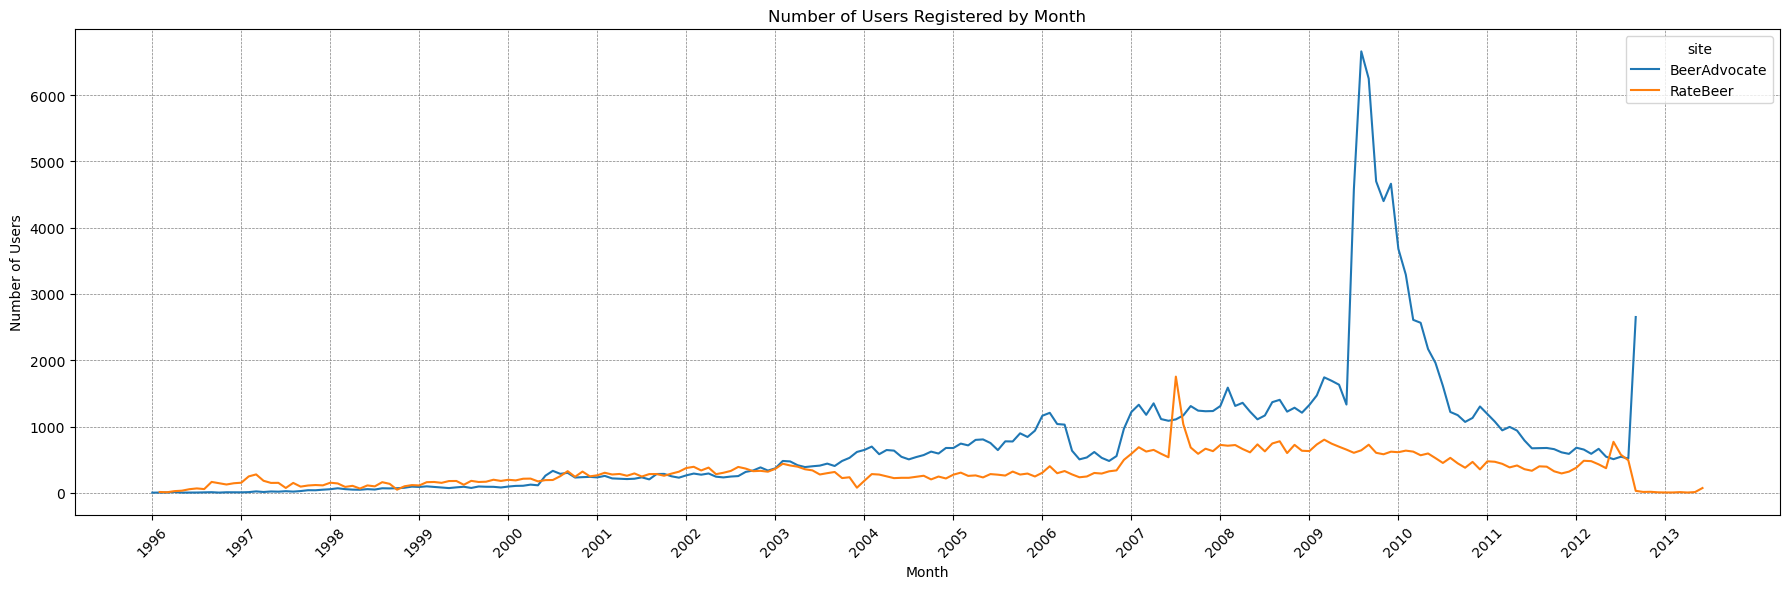

In [10]:
ba_users_plot = ba_users.copy()
rb_users_plot = rb_users.copy()
ba_users_plot["site"] = "BeerAdvocate"
rb_users_plot["site"] = "RateBeer"

# concatenation of users
df_plot = pd.concat([ba_users_plot, rb_users_plot], ignore_index=True)

# month and year calculation
df_plot['joined'] = pd.to_datetime(df_plot['joined'], format='%d/%m/%Y')
df_plot["month_year"] = df_plot['joined'].dt.to_period('M')
min_year = int(df_plot['joined'].dt.to_period('Y').sort_values().astype(str).iloc[0])
df_plot["month_year"] = df_plot["month_year"].astype(str)
nb_month = df_plot["month_year"].nunique()

# groupby site and month
df_plot = df_plot.groupby(["site","month_year"]).size().reset_index(name='nbr_users')

# figure 
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_plot, x='month_year', y='nbr_users',hue="site")

# title and ticks
plt.grid(True, axis='both', color='gray', linestyle='--', linewidth=0.5)
plt.title('Number of Users Registered by Month')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(ticks = np.arange(0,nb_month,12), labels=[year for year in range(min_year,min_year+len(np.arange(0,210,12)))], rotation=45)
plt.tight_layout()

plt.show()

## b) How are each platform’s reviewers distributed around the world over time ? Which platform is dominant in each region ?

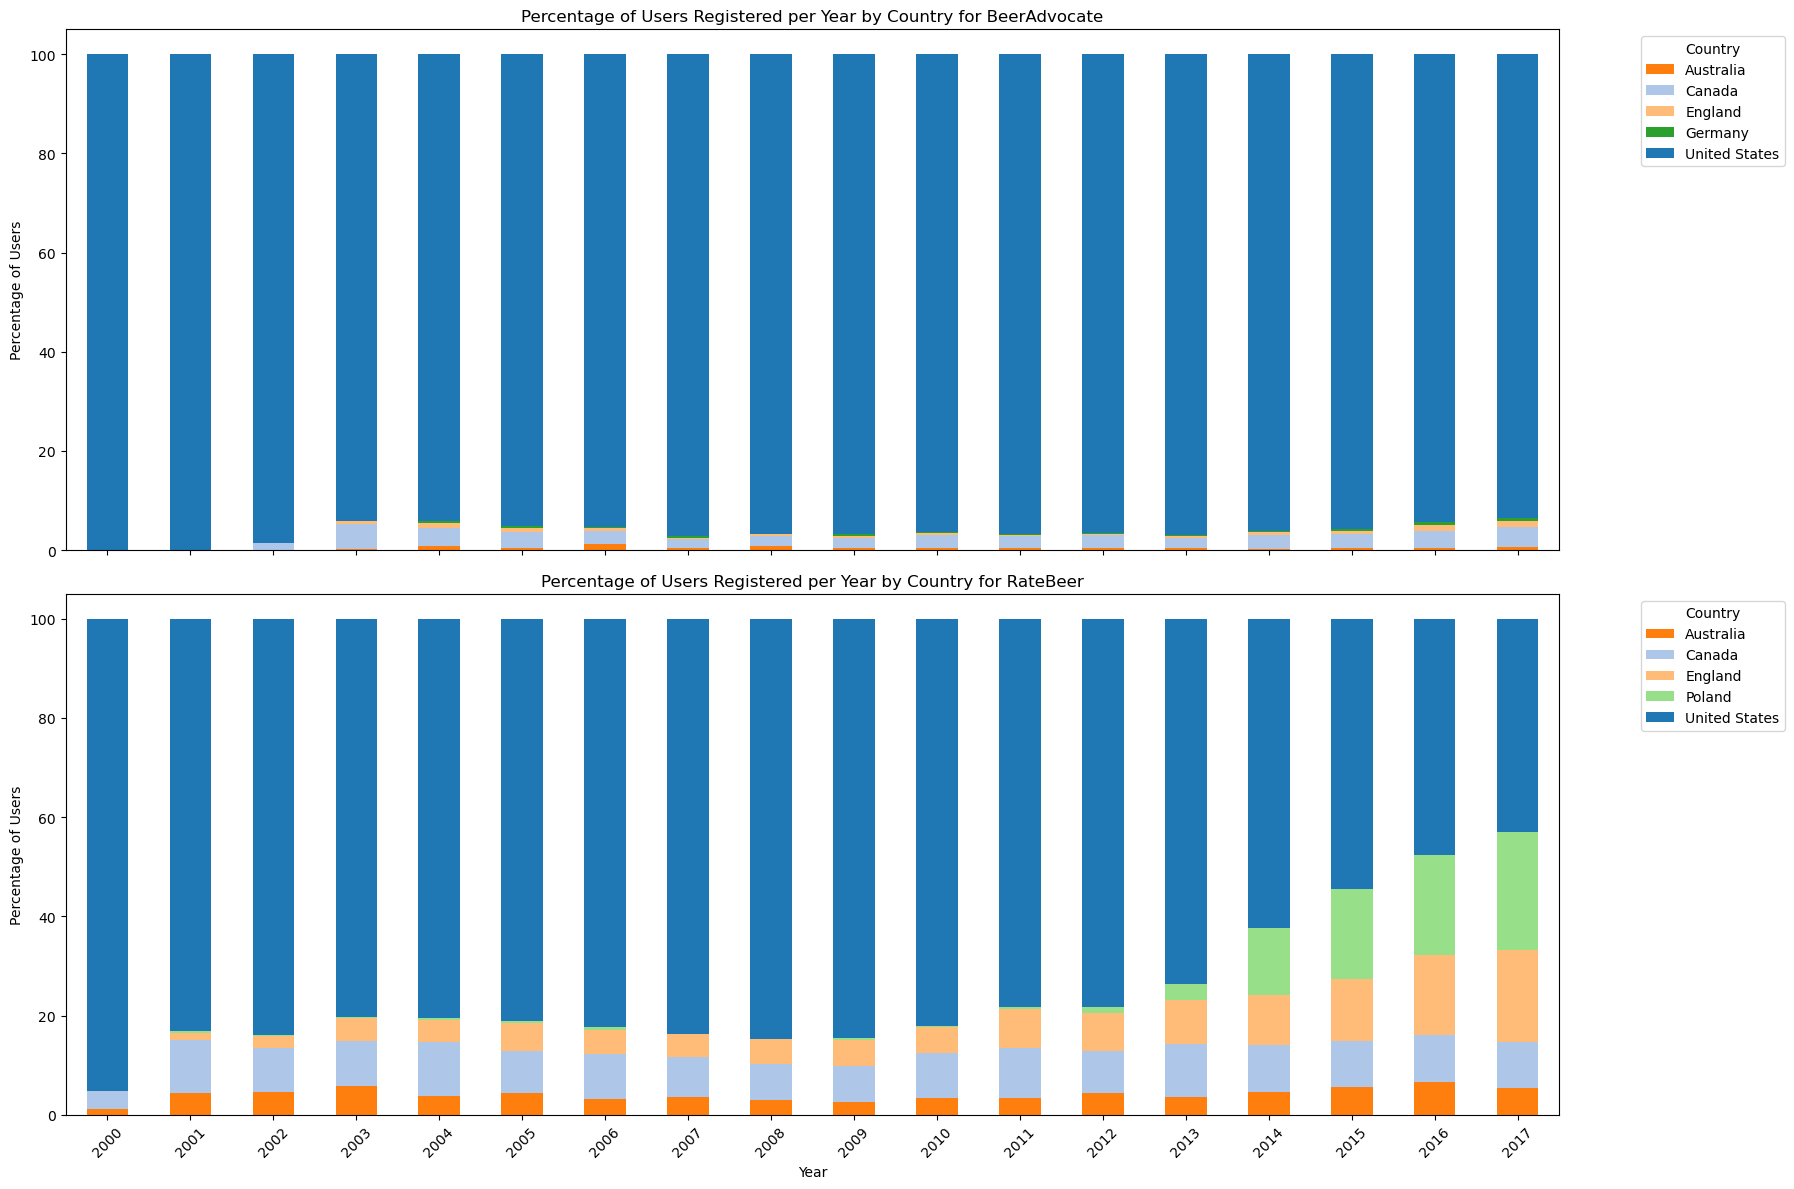

In [11]:
ba_users_plot = ba_users.copy()
rb_users_plot = rb_users.copy()
ba_users_plot["site"] = "BeerAdvocate"
rb_users_plot["site"] = "RateBeer"

# concatenation of users
df_plot = pd.concat([ba_users_plot, rb_users_plot], ignore_index=True)

# year calculation
df_plot['joined'] = pd.to_datetime(df_plot['joined'], format='%d/%m/%Y')
df_plot["year"] = df_plot['joined'].dt.to_period('Y')

# groupby site, year and country
df_grouped = df_plot.groupby(['site', 'year', 'country']).size().reset_index(name='nbr_users')

# selection of the 5 countries with the most users
top_countries = df_grouped.groupby(['site', 'country'])['nbr_users'].sum()
top_countries = top_countries.groupby(level=0, group_keys=False).nlargest(5).reset_index()
df_top_countries = df_grouped.merge(top_countries[['site', 'country']], on=['site', 'country'])

# compute percentage
nbr_users_pct = df_top_countries.groupby(['site', 'year']).apply(
    lambda group: group['nbr_users'] / group['nbr_users'].sum() * 100,
    include_groups=False
).reset_index(level=[0, 1], drop=True)

df_top_countries['nbr_users_pct'] = nbr_users_pct.values

# color palette
palette = sns.color_palette("tab20", len(df_top_countries['country'].unique()))
country_palette = dict(zip(df_top_countries['country'].unique(), palette))

# figure instance
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

# iteration avec the site (BeerAdocate et BeerRate)
for i, (site, data) in enumerate(df_top_countries.groupby('site')):
    # plot 
    data_pivot = data.pivot(index='year', columns='country', values='nbr_users_pct').fillna(0)
    data_pivot.plot(kind='bar', stacked=True, ax=axes[i], color=[country_palette[country] for country in data_pivot.columns])
    axes[i].set_title(f'Percentage of Users Registered per Year by Country for {site}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Percentage of Users')
    axes[i].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# ticks
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task 2 : Number of reviews : “On which platform is there the most activity in terms of reviews ?”


## a) How does the number of reviews evolve over time on both platforms ?

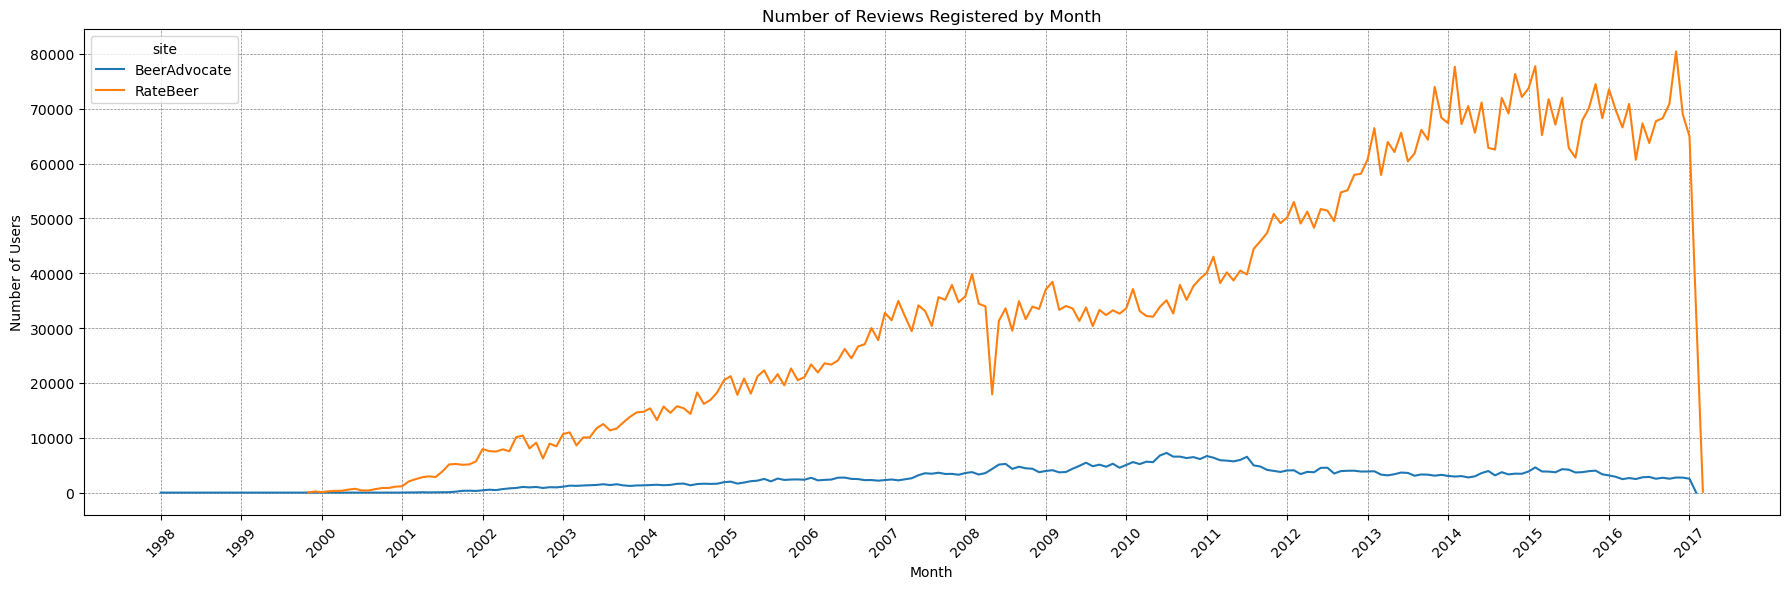

In [12]:
ba_reviews_plot = ba_reviews.copy()
rb_reviews_plot = rb_reviews.copy()
ba_reviews_plot["site"] = "BeerAdvocate"
rb_reviews_plot["site"] = "RateBeer"

# reviews concatenation
df_plot = pd.concat([ba_reviews_plot, rb_reviews_plot], ignore_index=True)

# computation of month and year
df_plot['joined'] = pd.to_datetime(df_plot['date'], format='%d/%m/%Y')
df_plot["month_year"] = df_plot['joined'].dt.to_period('M')
min_year = int(df_plot['joined'].dt.to_period('Y').sort_values().astype(str).iloc[0])
df_plot["month_year"] = df_plot["month_year"].astype(str)
nb_month = df_plot["month_year"].nunique()

# groupby site and month 
df_plot = df_plot.groupby(["site","month_year"]).size().reset_index(name='nbr_users')

# figure
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_plot, x='month_year', y='nbr_users',hue="site")

# title and ticks
plt.grid(True, axis='both', color='gray', linestyle='--', linewidth=0.5)
plt.title('Number of Reviews Registered by Month')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(ticks = np.arange(0,nb_month,12), labels=[year for year in range(min_year,min_year+len(np.arange(0,nb_month,12)))], rotation=45)
plt.tight_layout()

plt.show()

## b) How are each platform’s activity distributed around the world over time ? 

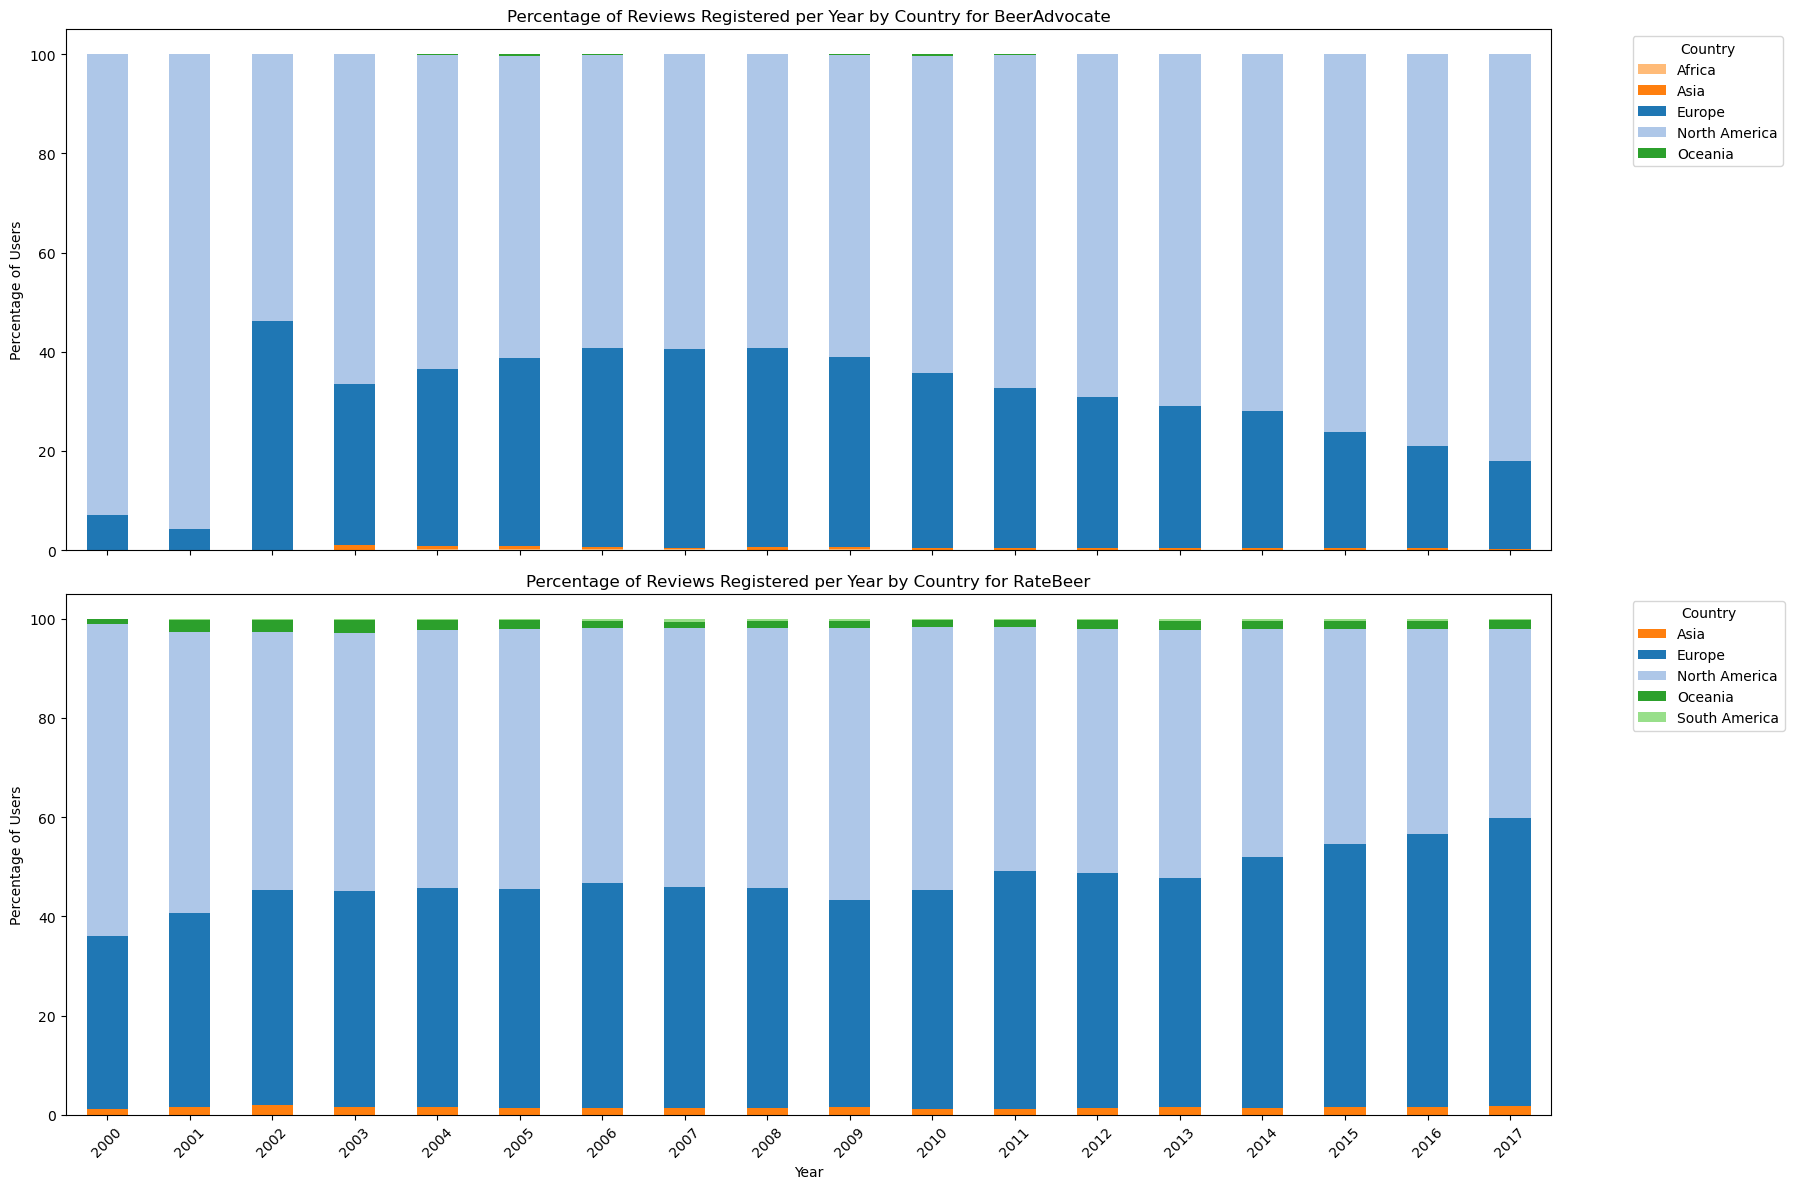

In [13]:
ba_reviews_plot = ba_reviews.copy()
rb_reviews_plot = rb_reviews.copy()
ba_reviews_plot["site"] = "BeerAdvocate"
rb_reviews_plot["site"] = "RateBeer"

# reviews concatenation
df_plot = pd.concat([ba_reviews_plot, rb_reviews_plot], ignore_index=True)

# computation of year
df_plot['joined'] = pd.to_datetime(df_plot['date'], format='%d/%m/%Y')
df_plot["year"] = df_plot['joined'].dt.to_period('Y')

# groupby site and month and continent
df_grouped = df_plot.groupby(['site', 'year', 'continent']).size().reset_index(name='nbr_users')

# selection if the 5 countries with the most users
top_countries = df_grouped.groupby(['site', 'continent'])['nbr_users'].sum()
top_countries = top_countries.groupby(level=0, group_keys=False).nlargest(5).reset_index()

df_top_countries = df_grouped.merge(top_countries[['site', 'continent']], on=['site', 'continent'])

# compute percentage
nbr_users_pct = df_top_countries.groupby(['site', 'year']).apply(
    lambda group: group['nbr_users'] / group['nbr_users'].sum() * 100,
    include_groups=False
).reset_index(level=[0, 1], drop=True)

df_top_countries['nbr_users_pct'] = nbr_users_pct.values

# compute palette
palette = sns.color_palette("tab20", len(df_top_countries['continent'].unique()))
country_palette = dict(zip(df_top_countries['continent'].unique(), palette))

# figure instance
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

# iteration avec the site (BeerAdocate et BeerRate)
for i, (site, data) in enumerate(df_top_countries.groupby('site')):
    data_pivot = data.pivot(index='year', columns='continent', values='nbr_users_pct').fillna(0)
    # plot
    data_pivot.plot(kind='bar', stacked=True, ax=axes[i], color=[country_palette[country] for country in data_pivot.columns])
    axes[i].set_title(f'Percentage of Reviews Registered per Year by Country for {site}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Percentage of Users')
    axes[i].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# ticks
plt.xticks(rotation=45)
plt.tight_layout()

# Affichez le graphique
plt.show()

# Task 3 : User activity : “On which platform are the reviewers most active ?”

## a) How is reviewers’ activity shared out ? What proportion of users have written more than 10 reviews ?

In [14]:
# pourcentage of reviews per active user (a user in considered active if he has > 10 reviews)
df_plot = rb_reviews.groupby("user_id").size().reset_index(name="nbr_reviews")
df_plot = df_plot[df_plot["nbr_reviews"] >= 10]
df_plot["mean"] = df_plot["nbr_reviews"] / df_plot["nbr_reviews"].sum()
display(df_plot)

,user_id,nbr_reviews,mean
1,100007,73,0.000010
2,100011,46,0.000007
3,100012,30,0.000004
7,100029,237,0.000034
9,100055,665,0.000095
...,...,...,...
70101,99908,26,0.000004
70102,99910,116,0.000017
70112,99959,93,0.000013
70119,99994,10,0.000001


In [15]:
# pourcentage of reviews per active user (a user in considered active if he has > 10 reviews)
df_plot = ba_reviews.groupby("user_id").size().reset_index(name="nbr_reviews")
df_plot = df_plot[df_plot["nbr_reviews"] >= 10]
df_plot["mean"] = df_plot["nbr_reviews"] / df_plot["nbr_reviews"].sum()
display(df_plot)

,user_id,nbr_reviews,mean
0,--dom--.709199,16,0.000030
2,-rick.912339,36,0.000068
6,01001111.219143,17,0.000032
7,0110x011.201955,34,0.000064
10,05harley.193544,37,0.000070
...,...,...,...
31775,ztaylor1.521076,11,0.000021
31779,zuggy9.70872,14,0.000026
31793,zx6chris.371552,12,0.000023
31801,zymurgy4all.11427,18,0.000034


# Task 4 : General trends : “What are the top-rated beers, styles, and breweries by year ? And overall ?

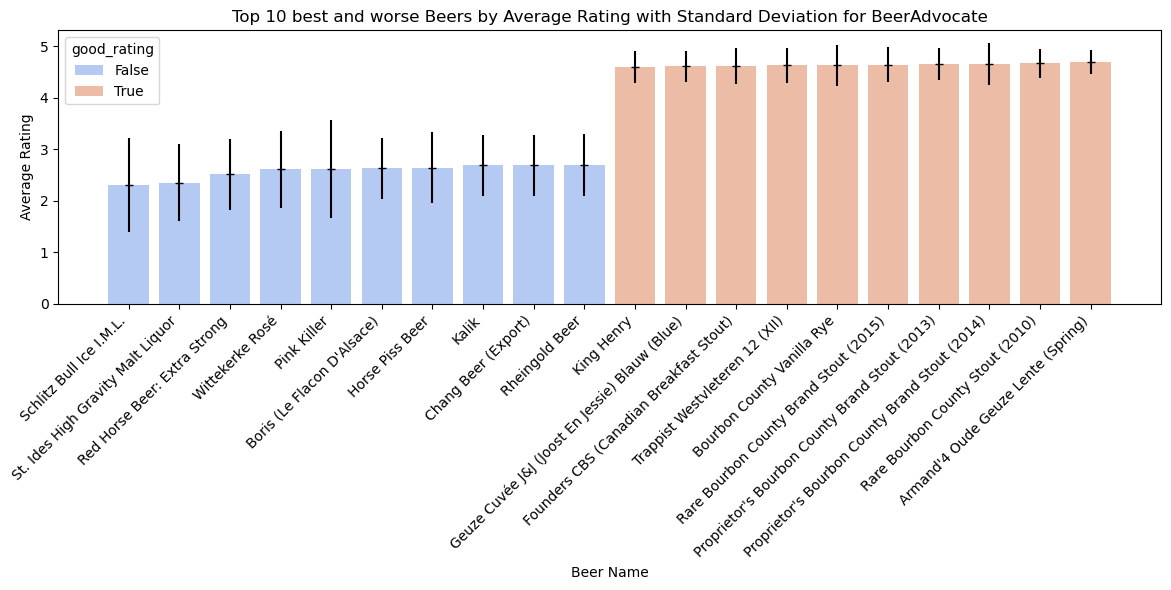

In [16]:
# groupby beername, and computing rating statistics
df_plot = ba_reviews.groupby("beer_name").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(10,("rating","mean")),df_plot.nsmallest(10,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='beer_name', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['beer_name'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 10 best and worse Beers by Average Rating with Standard Deviation for BeerAdvocate')
plt.xlabel('Beer Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

C:\Users\willi\AppData\Local\Temp\ipykernel_10868\3739893649.py:19: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\willi\anaconda3\envs\ada\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


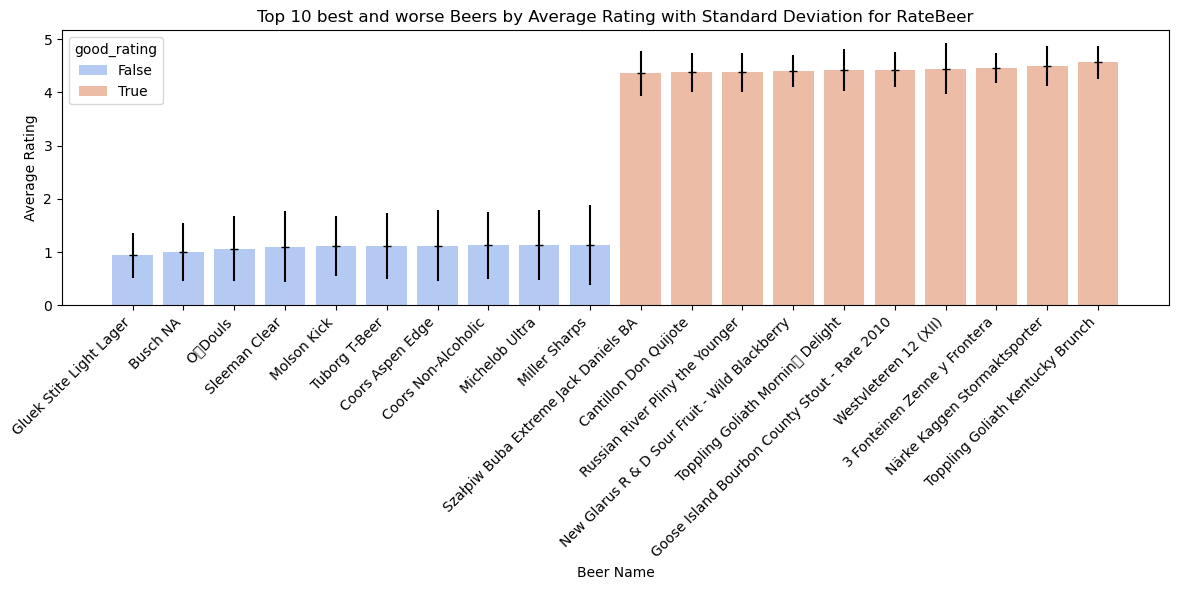

In [17]:
# groupby beername, and computing rating statistics
df_plot = rb_reviews.groupby("beer_name").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(10,("rating","mean")),df_plot.nsmallest(10,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='beer_name', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['beer_name'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 10 best and worse Beers by Average Rating with Standard Deviation for RateBeer')
plt.xlabel('Beer Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

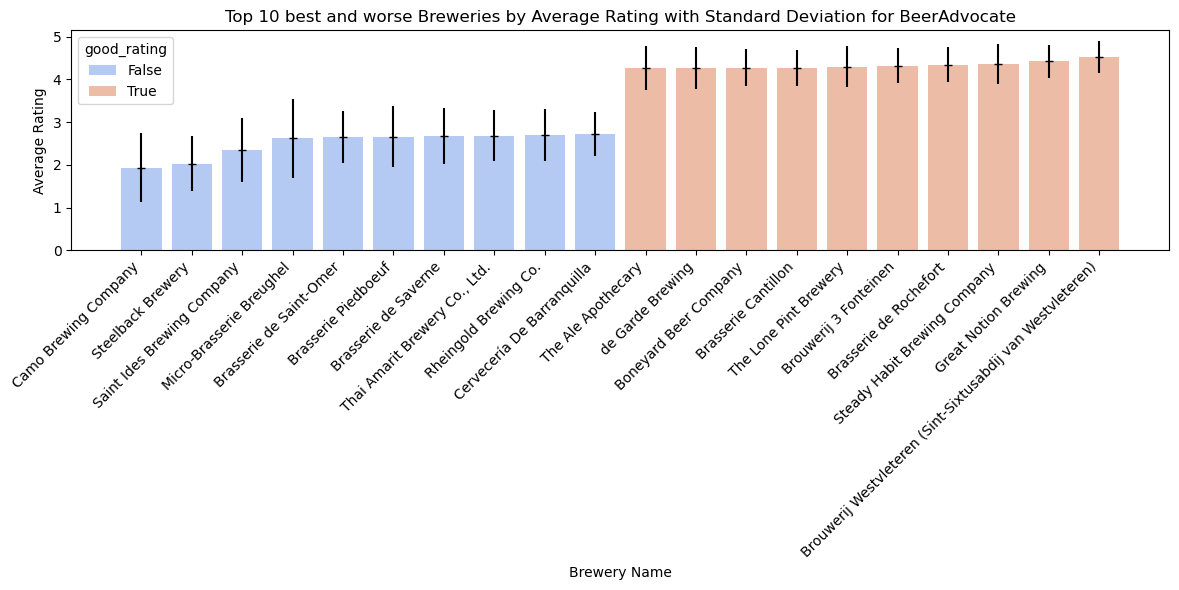

In [18]:
# groupby breweryname, and computing rating statistics
df_plot = ba_reviews.groupby("brewery_name").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(10,("rating","mean")),df_plot.nsmallest(10,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='brewery_name', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['brewery_name'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 10 best and worse Breweries by Average Rating with Standard Deviation for BeerAdvocate')
plt.xlabel('Brewery Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

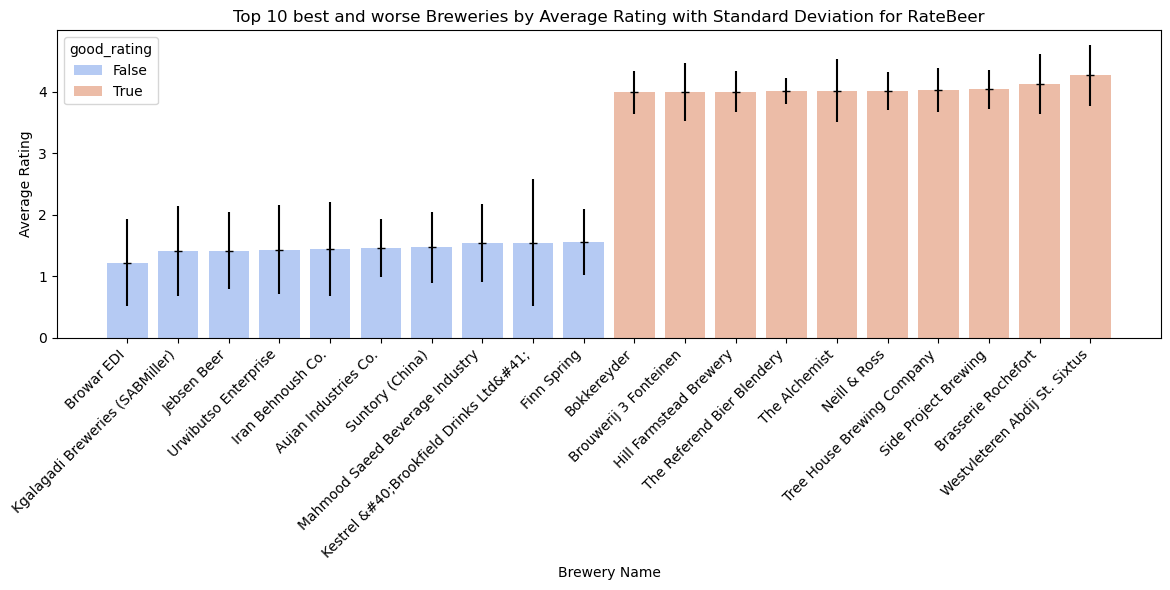

In [19]:
# groupby breweryname, and computing rating statistics
df_plot = rb_reviews.groupby("brewery_name").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(10,("rating","mean")),df_plot.nsmallest(10,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='brewery_name', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['brewery_name'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 10 best and worse Breweries by Average Rating with Standard Deviation for RateBeer')
plt.xlabel('Brewery Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Task 5 : User rating “How do reviewers rate the main types of beer on average on each platform ?”

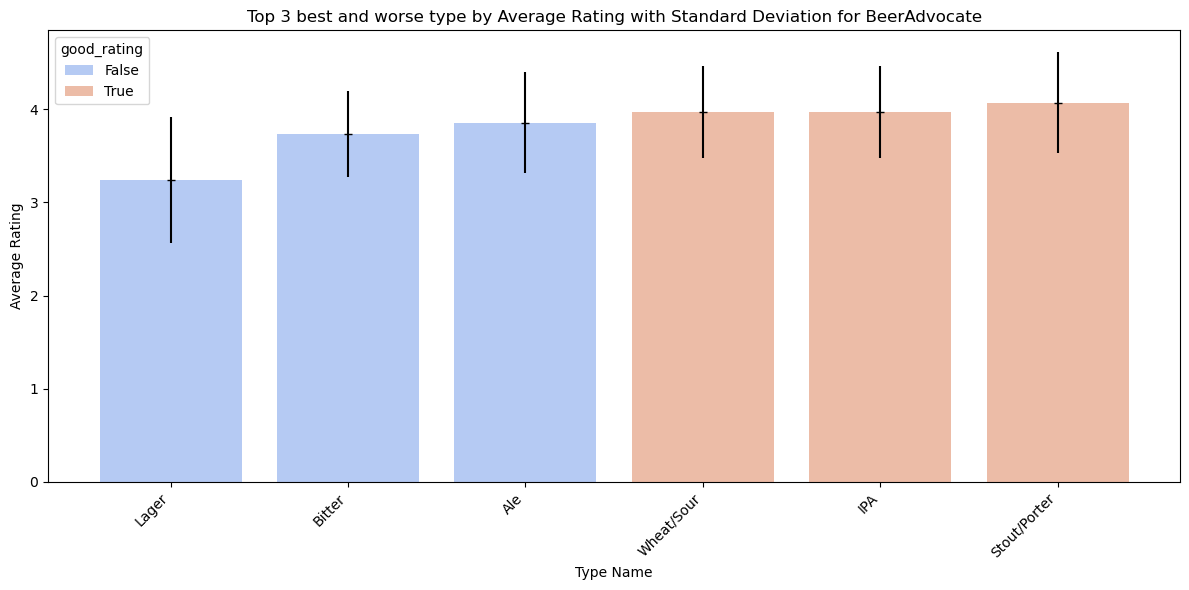

In [20]:
# groupby type, and computing rating statistics
df_plot = ba_reviews.groupby("type").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(3,("rating","mean")),df_plot.nsmallest(3,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='type', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['type'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 3 best and worse type by Average Rating with Standard Deviation for BeerAdvocate')
plt.xlabel('Type Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

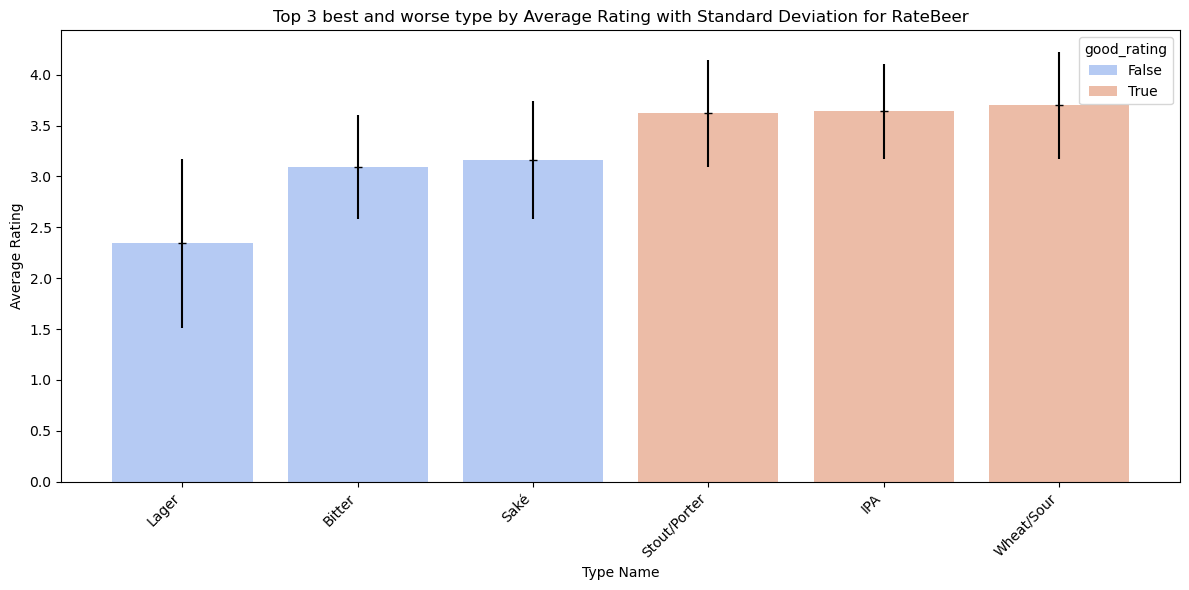

In [21]:
# groupby type, and computing rating statistics
df_plot = rb_reviews.groupby("type").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(3,("rating","mean")),df_plot.nsmallest(3,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='type', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['type'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 3 best and worse type by Average Rating with Standard Deviation for RateBeer')
plt.xlabel('Type Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# New Task 4 - User activity : What are the behaviors of reviewers on each platform?

In [51]:
rb_reviews_per_user = rb_reviews.groupby("user_id").size().reset_index(name="nbr_reviews")
rb_reviews_per_user["user_id"] = pd.to_numeric(rb_reviews_per_user["user_id"])
#rb_reviews_per_user.join(rb_users, on='user_id')
#df_plot = df_plot[df_plot["nbr_reviews"] >= 10]
#df_plot["mean"] = df_plot["nbr_reviews"] / df_plot["nbr_reviews"].sum()
display(rb_reviews_per_user)
rb_reviews_per_user.dtypes

,user_id,nbr_reviews
0,10,5
1,100007,73
2,100011,46
3,100012,30
4,100021,1
...,...,...
70116,99974,1
70117,99986,1
70118,99992,2
70119,99994,10


user_id        int64
nbr_reviews    int64
dtype: object

In [46]:
display(rb_users)
rb_users.dtypes

,Unnamed: 0,nbr_ratings,user_id,user_name,joined,location,country,continent
0,0,1890,175852,Manslow,20/05/2012,Poland,Poland,Europe
1,1,89,442761,MAGICuenca91,10/01/2017,Spain,Spain,Europe
2,2,169,288889,Sibarh,16/11/2013,Poland,Poland,Europe
3,3,3371,250510,fombe89,22/03/2013,Spain,Spain,Europe
4,4,13043,122778,kevnic2008,02/02/2011,Germany,Germany,Europe
...,...,...,...,...,...,...,...,...
70169,70169,1,134893,stamfordbus,05/09/2011,England,England,Europe
70170,70170,1,327816,fobia405,25/07/2014,Belgium,Belgium,Europe
70171,70171,1,183139,junkin,16/06/2012,NaN,NaN,Unknown
70172,70172,3,82020,klesidra,24/09/2008,Slovenia,Slovenia,Europe


Unnamed: 0      int64
nbr_ratings     int64
user_id         int64
user_name      object
joined         object
location       object
country        object
continent      object
dtype: object

In [54]:
display(pd.merge(rb_users, rb_reviews_per_user, on="user_id"))

,Unnamed: 0,nbr_ratings,user_id,user_name,joined,location,country,continent,nbr_reviews
0,0,1890,175852,Manslow,20/05/2012,Poland,Poland,Europe,1612
1,1,89,442761,MAGICuenca91,10/01/2017,Spain,Spain,Europe,81
2,2,169,288889,Sibarh,16/11/2013,Poland,Poland,Europe,162
3,3,3371,250510,fombe89,22/03/2013,Spain,Spain,Europe,3056
4,4,13043,122778,kevnic2008,02/02/2011,Germany,Germany,Europe,11866
...,...,...,...,...,...,...,...,...,...
70167,70169,1,134893,stamfordbus,05/09/2011,England,England,Europe,1
70168,70170,1,327816,fobia405,25/07/2014,Belgium,Belgium,Europe,1
70169,70171,1,183139,junkin,16/06/2012,NaN,NaN,Unknown,1
70170,70172,3,82020,klesidra,24/09/2008,Slovenia,Slovenia,Europe,3


In [23]:
ba_reviews_per_user = ba_reviews.groupby("user_id").size().reset_index(name="nbr_reviews")
#df_plot = df_plot[df_plot["nbr_reviews"] >= 10]
#df_plot["mean"] = df_plot["nbr_reviews"] / df_plot["nbr_reviews"].sum()
display(ba_reviews_per_user)

,user_id,nbr_reviews
0,--dom--.709199,16
1,--weezl--.789708,1
2,-rick.912339,36
3,-steve-.781156,6
4,-wizard-.1097150,1
...,...,...
31799,zymurgist12.1048285,1
31800,zymurgo.447590,1
31801,zymurgy4all.11427,18
31802,zymurgylabs.718885,1


In [56]:
display(ba_users)

,Unnamed: 0,nbr_ratings,nbr_reviews,user_id,user_name,joined,location,country,continent
0,0,7820,465,nmann08.184925,nmann08,07/01/2008,"United States, Washington",United States,North America
1,1,2521,2504,stjamesgate.163714,StJamesGate,08/10/2007,"United States, New York",United States,North America
2,2,1797,1143,mdagnew.19527,mdagnew,18/05/2005,Northern Ireland,Northern Ireland,Europe
3,3,31,31,helloloser12345.10867,helloloser12345,25/11/2004,Northern Ireland,Northern Ireland,Europe
4,4,604,604,cypressbob.3708,cypressbob,20/11/2003,Northern Ireland,Northern Ireland,Europe
...,...,...,...,...,...,...,...,...,...
153699,153699,1,1,everman.532342,Everman,30/11/2010,"United States, California",United States,North America
153700,153700,1,1,justin0001.352175,Justin0001,23/07/2009,"United States, California",United States,North America
153701,153701,1,0,kyungsup.982216,Kyungsup,02/05/2015,NaN,NaN,Unknown
153702,153702,1,1,joetex.800347,JoeTex,16/05/2014,"United States, California",United States,North America


In [71]:
import random
from sklearn.cluster import KMeans

In [70]:
# define features : mean_reviews_per_year


nan_in_column = ba_users['nbr_reviews'].isna().sum()
print(f"NaN values in 'nbr_reviews': {nan_in_column}")
nan_in_column = ba_users['year_joined'].isna().sum()
print(f"NaN values in 'joined': {nan_in_column}")
ba_users_joined = ba_users.dropna(subset=['joined'])

ba_users_joined['year_joined'] = ba_users_joined['joined'].str[-4:].astype(int)
max_year = ba_users_joined['year_joined'].max()
print(f"Last year for data: {max_year}")
ba_users_joined['mean_reviews_per_year'] = ba_users_joined['nbr_reviews']/(max_year+1-ba_users_joined['year_joined'])
display(ba_users_joined)


NaN values in 'nbr_reviews': 0
NaN values in 'joined': 2652
Last year for data: 2017


C:\Users\willi\AppData\Local\Temp\ipykernel_10868\4051976359.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_users_joined['year_joined'] = ba_users_joined['joined'].str[-4:].astype(int)
C:\Users\willi\AppData\Local\Temp\ipykernel_10868\4051976359.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_users_joined['mean_reviews_per_year'] = ba_users_joined['nbr_reviews']/(max_year+1-ba_users_joined['year_joined'])


,Unnamed: 0,nbr_ratings,nbr_reviews,user_id,user_name,joined,location,country,continent,year_joined,mean_reviews_per_year
0,0,7820,465,nmann08.184925,nmann08,07/01/2008,"United States, Washington",United States,North America,2008,46.500000
1,1,2521,2504,stjamesgate.163714,StJamesGate,08/10/2007,"United States, New York",United States,North America,2007,227.636364
2,2,1797,1143,mdagnew.19527,mdagnew,18/05/2005,Northern Ireland,Northern Ireland,Europe,2005,87.923077
3,3,31,31,helloloser12345.10867,helloloser12345,25/11/2004,Northern Ireland,Northern Ireland,Europe,2004,2.214286
4,4,604,604,cypressbob.3708,cypressbob,20/11/2003,Northern Ireland,Northern Ireland,Europe,2003,40.266667
...,...,...,...,...,...,...,...,...,...,...,...
153699,153699,1,1,everman.532342,Everman,30/11/2010,"United States, California",United States,North America,2010,0.125000
153700,153700,1,1,justin0001.352175,Justin0001,23/07/2009,"United States, California",United States,North America,2009,0.111111
153701,153701,1,0,kyungsup.982216,Kyungsup,02/05/2015,NaN,NaN,Unknown,2015,0.000000
153702,153702,1,1,joetex.800347,JoeTex,16/05/2014,"United States, California",United States,North America,2014,0.250000


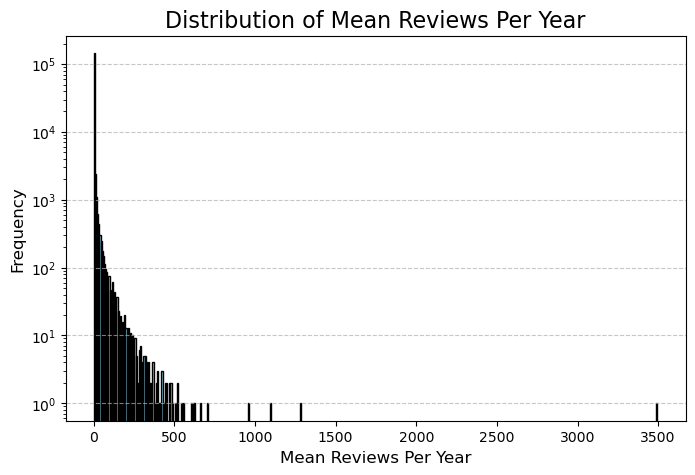

In [80]:
plt.figure(figsize=(8, 5))
plt.hist(ba_users_joined['mean_reviews_per_year'].dropna(), log=True, bins=500, color='skyblue', edgecolor='black')
plt.title('Distribution of Mean Reviews Per Year', fontsize=16)
plt.xlabel('Mean Reviews Per Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

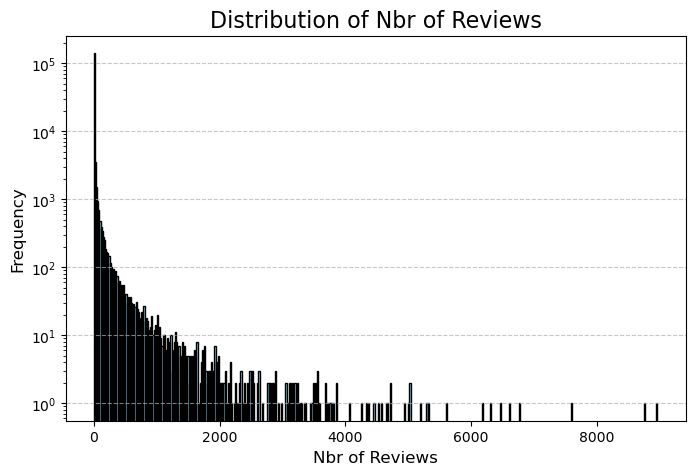

In [91]:
plt.figure(figsize=(8, 5))
plt.hist(ba_users_joined['nbr_reviews'].dropna(), log=True, bins=500, color='skyblue', edgecolor='black')
plt.title('Distribution of Nbr of Reviews', fontsize=16)
plt.xlabel('Nbr of Reviews', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [93]:
# Prepare the data
feature = ba_users_joined[['mean_reviews_per_year']].dropna()  # Drop NaN values in the column

# Apply K-Means clustering
n_clusters = 5  # Set the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
feature['Cluster'] = kmeans.fit_predict(feature)

# Add the cluster labels back to the original DataFrame
ba_users_joined['Cluster'] = pd.NA  # Initialize with NaN
ba_users_joined.loc[feature.index, 'Cluster'] = feature['Cluster']

# Display cluster centroids
print("Cluster Centers:", kmeans.cluster_centers_)

# Check the DataFrame with clusters
display(ba_users_joined)

Cluster Centers: [[7.36352817e-01]
 [5.62886132e+01]
 [4.95275519e+02]
 [3.49600000e+03]
 [1.85836893e+02]]


C:\Users\willi\AppData\Local\Temp\ipykernel_10868\1893227434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_users_joined['Cluster'] = pd.NA  # Initialize with NaN


,Unnamed: 0,nbr_ratings,nbr_reviews,user_id,user_name,joined,location,country,continent,year_joined,mean_reviews_per_year,Cluster
0,0,7820,465,nmann08.184925,nmann08,07/01/2008,"United States, Washington",United States,North America,2008,46.500000,1
1,1,2521,2504,stjamesgate.163714,StJamesGate,08/10/2007,"United States, New York",United States,North America,2007,227.636364,4
2,2,1797,1143,mdagnew.19527,mdagnew,18/05/2005,Northern Ireland,Northern Ireland,Europe,2005,87.923077,1
3,3,31,31,helloloser12345.10867,helloloser12345,25/11/2004,Northern Ireland,Northern Ireland,Europe,2004,2.214286,0
4,4,604,604,cypressbob.3708,cypressbob,20/11/2003,Northern Ireland,Northern Ireland,Europe,2003,40.266667,1
...,...,...,...,...,...,...,...,...,...,...,...,...
153699,153699,1,1,everman.532342,Everman,30/11/2010,"United States, California",United States,North America,2010,0.125000,0
153700,153700,1,1,justin0001.352175,Justin0001,23/07/2009,"United States, California",United States,North America,2009,0.111111,0
153701,153701,1,0,kyungsup.982216,Kyungsup,02/05/2015,NaN,NaN,Unknown,2015,0.000000,0
153702,153702,1,1,joetex.800347,JoeTex,16/05/2014,"United States, California",United States,North America,2014,0.250000,0


In [94]:
cluster0 = ba_users_joined[ba_users_joined['Cluster']==0]
cluster0.describe()
# not good because we won't design someone with 28 reviews per year as inactive

,Unnamed: 0,nbr_ratings,nbr_reviews,year_joined,mean_reviews_per_year
count,148786.000000,148786.000000,148786.000000,148786.000000,148786.000000
mean,78168.081157,38.836060,5.460366,2012.548849,0.735605
std,43815.247804,175.989891,23.948402,2.877221,2.629445
min,3.000000,1.000000,0.000000,2000.000000,0.000000
25%,40447.250000,1.000000,0.000000,2011.000000,0.000000
50%,78387.500000,3.000000,0.000000,2014.000000,0.000000
75%,116079.750000,14.000000,1.000000,2014.000000,0.307692
max,153703.000000,10360.000000,456.000000,2017.000000,28.500000


In [90]:
cluster1 = ba_users_joined[ba_users_joined['Cluster']==1]
cluster1.describe()

,Unnamed: 0,nbr_ratings,nbr_reviews,year_joined,mean_reviews_per_year
count,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000
mean,9361.075667,700.260207,480.438759,2009.436581,56.157636
std,11236.287741,637.731267,321.754701,4.006793,24.169765
min,0.000000,32.000000,29.000000,1996.000000,28.533333
25%,2194.000000,343.000000,251.000000,2006.000000,36.444444
50%,6133.000000,539.000000,404.000000,2009.000000,48.500000
75%,11738.000000,864.000000,634.000000,2013.000000,70.636364
max,87709.000000,7891.000000,1928.000000,2017.000000,121.000000


In [89]:
cluster4 = ba_users_joined[ba_users_joined['Cluster']==4]
cluster4.describe()

,Unnamed: 0,nbr_ratings,nbr_reviews,year_joined,mean_reviews_per_year
count,383.000000,383.000000,383.000000,383.000000,383.000000
mean,4247.906005,1997.530026,1612.161880,2009.386423,185.498798
std,5749.139439,1280.271340,920.871537,3.798184,56.828823
min,1.000000,135.000000,135.000000,1996.000000,121.083333
25%,823.500000,1138.500000,956.000000,2007.000000,140.500000
50%,2154.000000,1755.000000,1456.000000,2009.000000,167.764706
75%,5491.500000,2537.500000,2043.500000,2012.000000,216.663636
max,45994.000000,10180.000000,5316.000000,2017.000000,340.090909
